In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
df=pd.read_csv("dataset.csv")

In [60]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [62]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

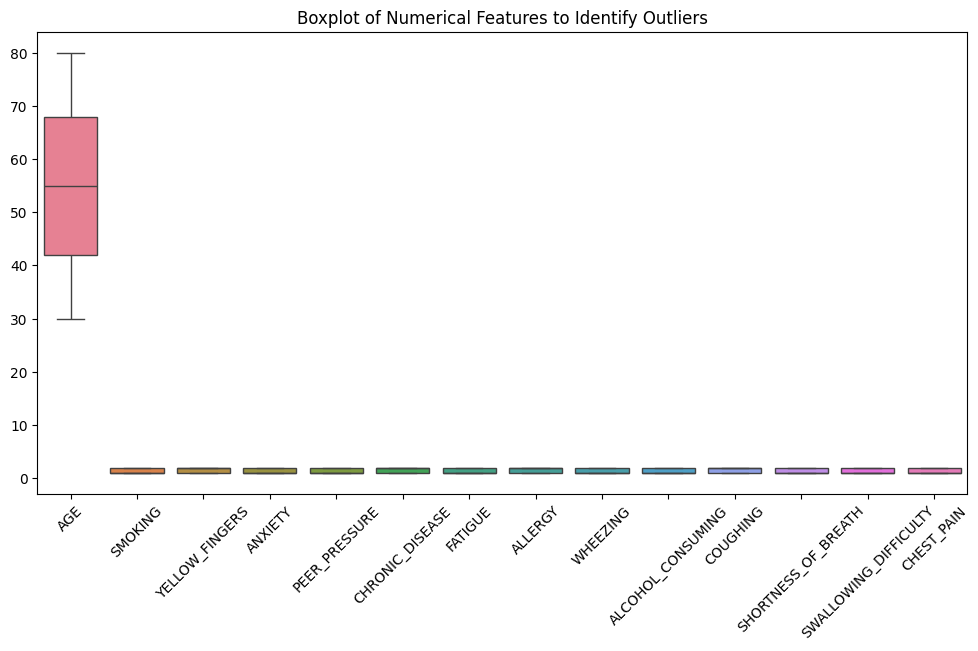

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing outliers using boxplot for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features to Identify Outliers')
plt.xticks(rotation=45)
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [65]:
# labelencoding for numeric catagorical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_c=df[['GENDER','SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']]
for col in df_c.columns:
  df[col]=le.fit_transform(df[col])

In [66]:
for col in df_c.columns:
  print(df[col].value_counts())

GENDER
1    1514
0    1486
Name: count, dtype: int64
SMOKING
0    1527
1    1473
Name: count, dtype: int64
YELLOW_FINGERS
1    1542
0    1458
Name: count, dtype: int64
ANXIETY
0    1518
1    1482
Name: count, dtype: int64
PEER_PRESSURE
0    1503
1    1497
Name: count, dtype: int64
CHRONIC_DISEASE
1    1529
0    1471
Name: count, dtype: int64
FATIGUE
0    1531
1    1469
Name: count, dtype: int64
ALLERGY
1    1520
0    1480
Name: count, dtype: int64
WHEEZING
0    1508
1    1492
Name: count, dtype: int64
ALCOHOL_CONSUMING
0    1526
1    1474
Name: count, dtype: int64
COUGHING
1    1532
0    1468
Name: count, dtype: int64
SHORTNESS_OF_BREATH
0    1536
1    1464
Name: count, dtype: int64
SWALLOWING_DIFFICULTY
0    1531
1    1469
Name: count, dtype: int64
CHEST_PAIN
0    1504
1    1496
Name: count, dtype: int64
LUNG_CANCER
1    1518
0    1482
Name: count, dtype: int64


In [67]:
# Convert boolean data values to numerical values
# This will convert True to 1 and False to 0

# First, identify boolean columns
bool_columns = df.select_dtypes(include=['bool']).columns

# Display the number of boolean columns found
print(f"Number of boolean columns found: {len(bool_columns)}")

# Convert boolean columns to integers (True becomes 1, False becomes 0)
for column in bool_columns:
    df[column] = df[column].astype(int)

# Verify the conversion by checking data types
print("\nData types after conversion:")
print(df.dtypes.value_counts())

# Display a sample of the converted data
print("\nSample of data after boolean conversion:")
print(df.head(3))


Number of boolean columns found: 0

Data types after conversion:
int64    16
Name: count, dtype: int64

Sample of data after boolean conversion:
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   65        0               0        0              1   
1       0   55        0               1        1              0   
2       0   78        1               1        0              0   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                1        0        1         1                  1         1   
1                0        1        1         1                  0         0   
2                0        1        0         1                  0         0   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  LUNG_CANCER  
0                    1                      1           0            0  
1                    0                      1           1            0  
2                    1                      0     

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 3000 non-null   int64
 1   AGE                    3000 non-null   int64
 2   SMOKING                3000 non-null   int64
 3   YELLOW_FINGERS         3000 non-null   int64
 4   ANXIETY                3000 non-null   int64
 5   PEER_PRESSURE          3000 non-null   int64
 6   CHRONIC_DISEASE        3000 non-null   int64
 7   FATIGUE                3000 non-null   int64
 8   ALLERGY                3000 non-null   int64
 9   WHEEZING               3000 non-null   int64
 10  ALCOHOL_CONSUMING      3000 non-null   int64
 11  COUGHING               3000 non-null   int64
 12  SHORTNESS_OF_BREATH    3000 non-null   int64
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64
 14  CHEST_PAIN             3000 non-null   int64
 15  LUNG_CANCER            3000 non-null  

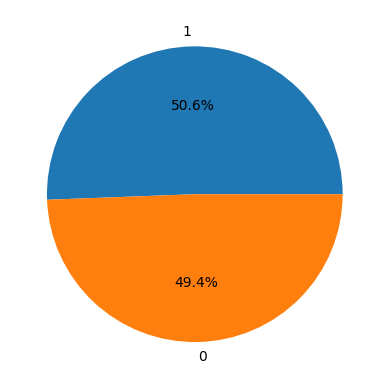

In [69]:
plt.pie(df['LUNG_CANCER'].value_counts(),labels=df['LUNG_CANCER'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [70]:
#checking duplicate value
for i in df.columns:
  print(f"For {i}: ",df[i].duplicated().sum())

For GENDER:  2998
For AGE:  2949
For SMOKING:  2998
For YELLOW_FINGERS:  2998
For ANXIETY:  2998
For PEER_PRESSURE:  2998
For CHRONIC_DISEASE:  2998
For FATIGUE:  2998
For ALLERGY:  2998
For WHEEZING:  2998
For ALCOHOL_CONSUMING:  2998
For COUGHING:  2998
For SHORTNESS_OF_BREATH:  2998
For SWALLOWING_DIFFICULTY:  2998
For CHEST_PAIN:  2998
For LUNG_CANCER:  2998


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 3000 non-null   int64
 1   AGE                    3000 non-null   int64
 2   SMOKING                3000 non-null   int64
 3   YELLOW_FINGERS         3000 non-null   int64
 4   ANXIETY                3000 non-null   int64
 5   PEER_PRESSURE          3000 non-null   int64
 6   CHRONIC_DISEASE        3000 non-null   int64
 7   FATIGUE                3000 non-null   int64
 8   ALLERGY                3000 non-null   int64
 9   WHEEZING               3000 non-null   int64
 10  ALCOHOL_CONSUMING      3000 non-null   int64
 11  COUGHING               3000 non-null   int64
 12  SHORTNESS_OF_BREATH    3000 non-null   int64
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64
 14  CHEST_PAIN             3000 non-null   int64
 15  LUNG_CANCER            3000 non-null  

In [72]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [73]:
df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']].describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,0.491000,0.514000,0.494000,0.499000,0.509667,0.489667,0.506667,0.497333,0.491333,0.510667,0.488000,0.489667,0.498667,0.506000
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082,0.500047
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
